In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.ensemble  import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


file_path = 'CFD.xlsx'

df = pd.read_excel(file_path)

In [ ]:
df['rotating'] = df['rotating'].replace({'co': 0, 'counter': 1})
features = df.drop('torque', axis=1)
target = df['torque']
sc = MinMaxScaler()
X = features
y = target
X_scale = sc.fit_transform(X)
X_scale

array([[0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.11111111, 0.        ],
       [0.        , 0.        , 0.22222222, 0.        ],
       ...,
       [1.        , 1.        , 1.        , 1.        ],
       [0.75      , 1.        , 0.33333333, 1.        ],
       [0.75      , 1.        , 0.33333333, 1.        ]])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size = 0.30, random_state = 42,stratify=df.rotating)

In [ ]:
RF = RandomForestRegressor(random_state=42)
RF.fit(X_train,y_train)
y_pred = RF.predict(X_test)

In [ ]:
y_pred_train = RF.predict(X_train)
mse = mean_squared_error(y_train, y_pred_train)
r2 = r2_score(y_train, y_pred_train)
mse,r2

(1.3165272302853017e-09, 0.9995089213892397)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse,r2

(1.0688833924528027e-08, 0.99665289241889)

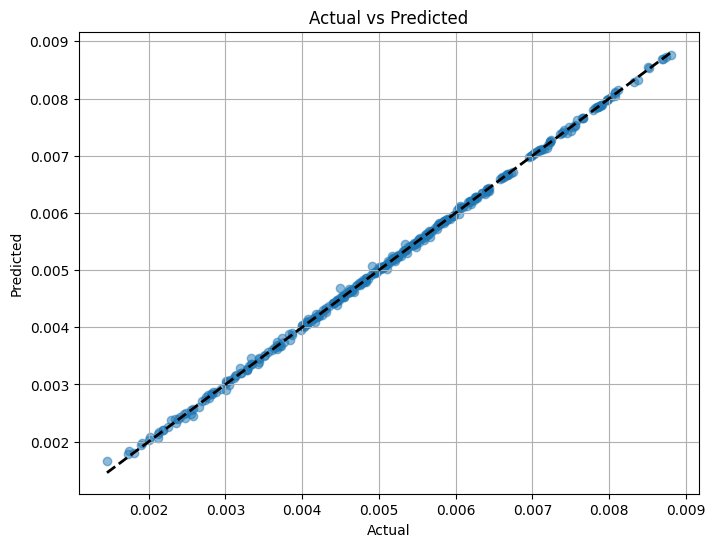

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_pred_train, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Diagonal line for reference
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.grid(True)
plt.show()

In [ ]:
importances = RF.feature_importances_
importances

array([0.00299421, 0.03817916, 0.51745339, 0.44137324])

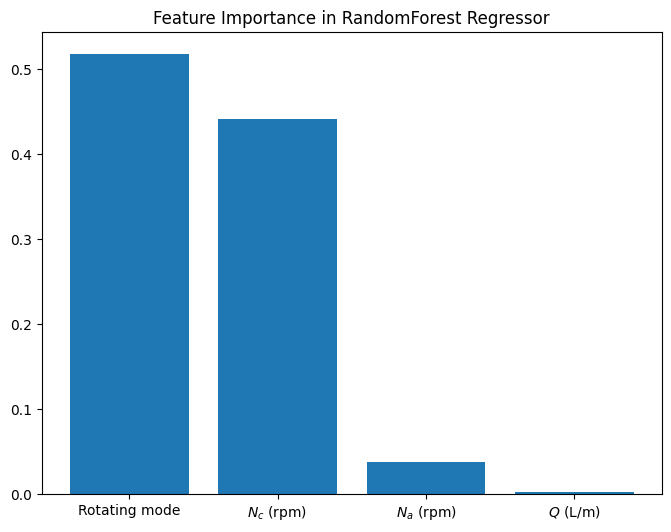

In [ ]:
feature_list = list(X.columns)  # List of your feature names
feature_importance = sorted(zip(importances, feature_list), reverse=True)
plt.figure(figsize=(8,6))
plt.bar(range(len(feature_importance)), [val[0] for val in feature_importance], align='center')
plt.xticks(range(len(feature_importance)), ['Rotating mode','$N_{c}$ (rpm)','$N_{a}$ (rpm)','$Q$ (L/m)'])
#plt.xticks([5,10, 15 ,20])
plt.title('Feature Importance in RandomForest Regressor')
plt.show()